 # Image Classification using Transfer Learning - ResNet50


In [1]:
from IPython.display import Image

# 1. Importing Libraries

In [2]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers

# Library for Transfer Learning
from tensorflow.keras.applications import resnet50

print("Importing libraries completed.")

Importing libraries completed.


# 2. Data Gethering

In [3]:
# listing the folders containing images

# Main Dataset
main_folder="/kaggle/input/skinlesions-data/skinlesions/"
class_names=os.listdir(os.path.join(main_folder,"train/"))
print(class_names)

# Validation Dataset
validation_folder="/kaggle/input/skinlesions-data/skinlesions/valid/"
val_class_names=os.listdir(validation_folder)
print(val_class_names)

['melanoma', 'seborrheic_keratosis', 'nevus']
['melanoma', 'seborrheic_keratosis', 'nevus']


# 3. Preparing Data

In [4]:
x = []
y = []
trainDatasets = "/kaggle/input/skinlesions-data/skinlesions/train/"
for i in os.listdir(trainDatasets):
    for j in os.listdir(trainDatasets+i+"/"):
        img = image.load_img(trainDatasets+i+"/"+j)
        img=image.img_to_array(img)
        img=resnet50.preprocess_input(img)
        x.append(img)
        y.append(class_names.index(i))

In [5]:
#print(x)
#print(y)

In [6]:
valid_images = []
valid_imge_label = []
validDatasets = "/kaggle/input/skinlesions-data/skinlesions/valid/"
for i in os.listdir(validDatasets):
    for j in os.listdir(validDatasets+i+"/"):
        img = image.load_img(validDatasets+i+"/"+j)
        img=image.img_to_array(img)
        img=resnet50.preprocess_input(img)
        valid_images.append(img)
        valid_imge_label.append(class_names.index(i))


# 4. Verification of Data

In [7]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)


# Validation Dataset
print("Validation Dataset")

val_images=np.array(valid_images) 
print(val_images.shape)

val_image_label=to_categorical(valid_imge_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(2000, 224, 224, 3)
(2000, 3)
Validation Dataset
(150, 224, 224, 3)
(150, 3)


# 5. Building a Model: Using Transfer Learning

In [8]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default ResNet50 model.\n")

# we are using resnet50 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import resnet50

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_resnet=resnet50.ResNet50(weights='imagenet')

# display the summary to see the properties of the model
model_resnet.summary()

Summary of default ResNet50 model.

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                      

In [9]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements

print("Summary of Custom ResNet50 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (224,224,3)
input_layer=layers.Input(shape=(224,224,3))

# initialize the transfer model ResNet50 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the ResNet50 using input_tensor
# 3) we want to change the last layer so we are not including top layer
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
resnet_model.summary()

Summary of Custom ResNet50 model.

1) We setup input layer and 2) We removed top (last) layer. 

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                            

In [10]:
# access the current last layer of the model and add flatten and dense after it

print("Summary of Custom ResNet50 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=resnet_model.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer
# dense1=layers.Dense(224,activation='relu')(flatten)

# Add dense layer to the final output layer
output_layer=layers.Dense(3,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom ResNet50 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                   

In [11]:
# we will freez all the layers except the last layer

# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                            

In [12]:
# Train the Model

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)

print("Splitting data for train and test completed.")

Splitting data for train and test completed.


In [13]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")

Model compilation completed.


In [14]:
# Fit the Model

model.fit(xtrain,ytrain,epochs=20,batch_size=64,verbose=True,validation_data=(xtest,ytest))

print("Fitting the model completed.")

Epoch 1/20
25/25 [==============================] - 20s 359ms/step - loss: 10.2357 - accuracy: 0.6150 - val_loss: 3.8195 - val_accuracy: 0.7400
Epoch 2/20
25/25 [==============================] - 6s 224ms/step - loss: 1.9597 - accuracy: 0.8150 - val_loss: 4.4245 - val_accuracy: 0.6950
Epoch 3/20
25/25 [==============================] - 6s 232ms/step - loss: 0.5170 - accuracy: 0.9319 - val_loss: 5.3962 - val_accuracy: 0.6950
Epoch 4/20
25/25 [==============================] - 6s 225ms/step - loss: 0.3816 - accuracy: 0.9450 - val_loss: 4.1807 - val_accuracy: 0.7325
Epoch 5/20
25/25 [==============================] - 6s 233ms/step - loss: 0.1906 - accuracy: 0.9681 - val_loss: 4.6077 - val_accuracy: 0.7350
Epoch 6/20
25/25 [==============================] - 6s 230ms/step - loss: 0.1040 - accuracy: 0.9800 - val_loss: 3.7582 - val_accuracy: 0.7425
Epoch 7/20
25/25 [==============================] - 6s 235ms/step - loss: 0.0871 - accuracy: 0.9794 - val_loss: 3.9701 - val_accuracy: 0.7400
Epoc

# 6. Model Evaluation

In [15]:
# This function helps to predict individual image supplied to it
def predict(img_name):
    img=image.load_img(img_name,target_size=(224,224))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=resnet50.preprocess_input(img)
    prediction=model.predict(img.reshape(1,224,224,3))
    output=np.argmax(prediction)
    print(class_names[output])

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
#     plt.imshow(img) # showing b/w image
    plt.imshow(img.astype('int32'))
    
#     print(*predictions_array)
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

#     print(predicted_label)
#     print(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour
    plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label], 100*np.max(predictions_array), val_class_names[true_label]), color=color)

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)
#     print(predicted_label)
#     print(true_label)
    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

# 7. Predictions

In [16]:
# Preparing prediction arrary
predictions=[]

for img in val_images:
    img=img.reshape(1,224,224,3)
    predictions.append(model.predict(img))

1/1 [==============================] - 0s 30ms/step


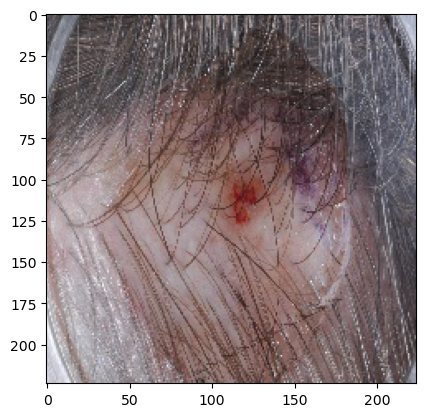

1/1 [==============================] - 0s 32ms/step
nevus


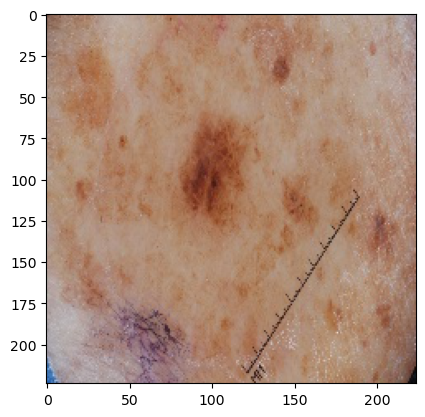

1/1 [==============================] - 0s 45ms/step
melanoma


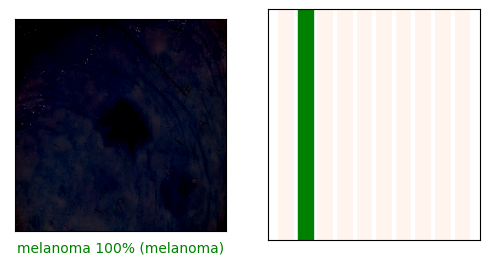

In [17]:

predict('/kaggle/input/skinlesions-data/skinlesions/test/nevus/ISIC_0012149.jpg') 
    

predict('/kaggle/input/skinlesions-data/skinlesions/test/melanoma/ISIC_0013242.jpg')

# call the function

# defining parameters to pass to function
i=22 # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i,predictions, val_image_label, val_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()

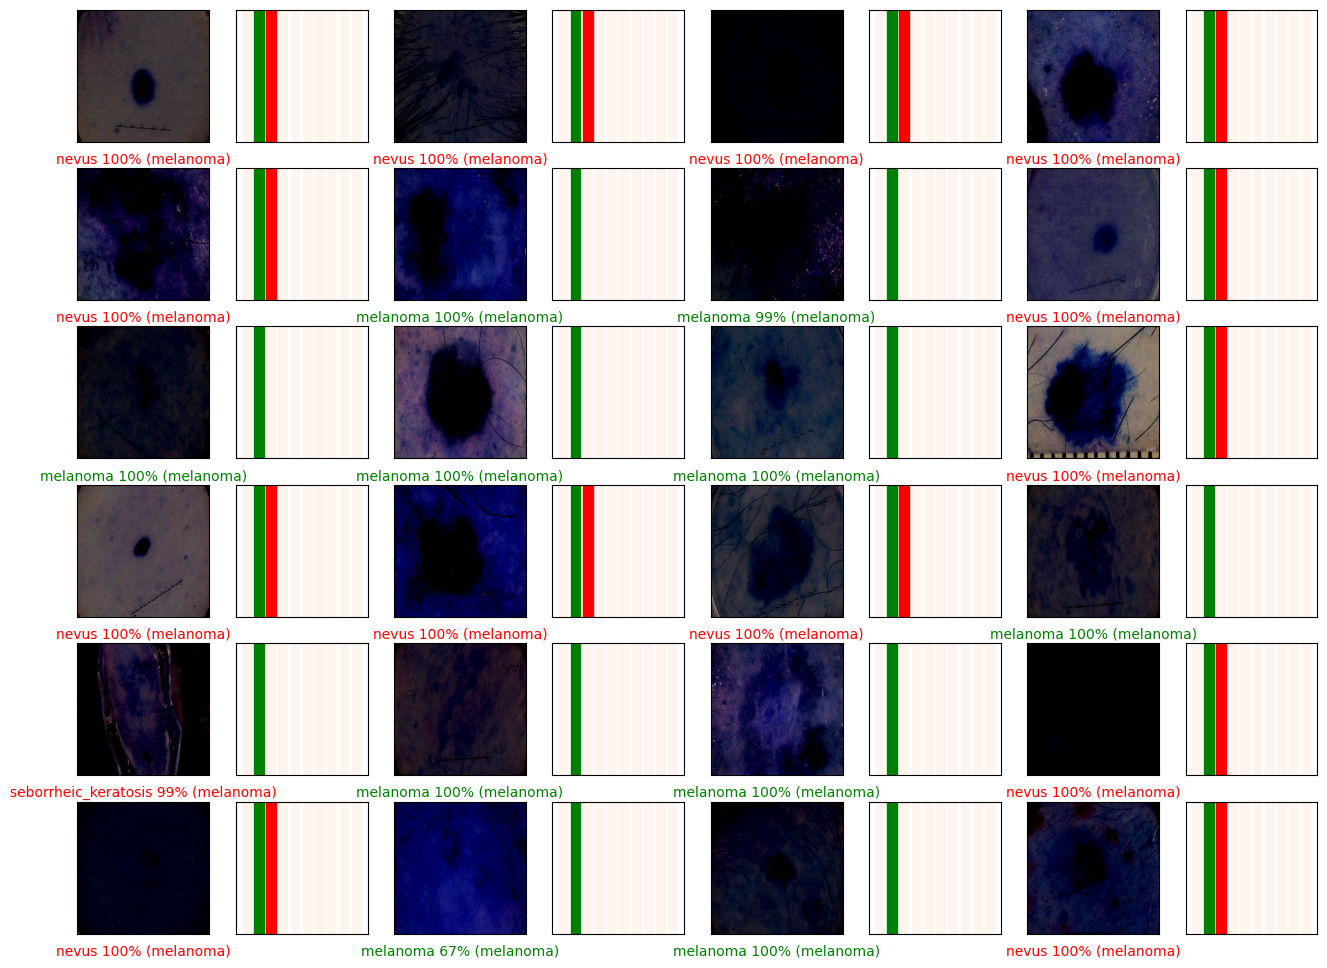

In [18]:
# Prediction on Validation images

# Declaring variables
num_rows=6
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)

    plot_image(i,predictions, val_image_label, val_images)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, val_image_label)
plt.show()